# 회귀 알고리즘과 모델 규제

## 1. KNN 이웃 회귀
knn 알고리즘으로, 지도학습 중 하나인 회귀를 구현한다.

### 1) 회귀란?
회귀의 정의에 대해 설명한다.

지도학습은 분류와 회귀로 나뉘는데, 그 중 하나인 회귀에 대해 설명하려한다.<p>
- 분류는 라벨링이 필요하다. 즉, 분류를 했을 때 이 그룹의 이름은 무엇이고, 다른 그룹의 이름은 무엇인지를 이름 붙여줘야한다. <br>
- 달리, 회귀는 **데이터 값 자체를 예측**한다는 점에서 차이가 있다.
- 분류에서는 타깃값이 클래스였다면, 회귀에서는 타깃값이 **임의의 값**이다.

### 2) KNN 이웃 회귀
knn 이웃 회귀와 knn 이웃 분류가 어떻게 다른지를 설명한다.

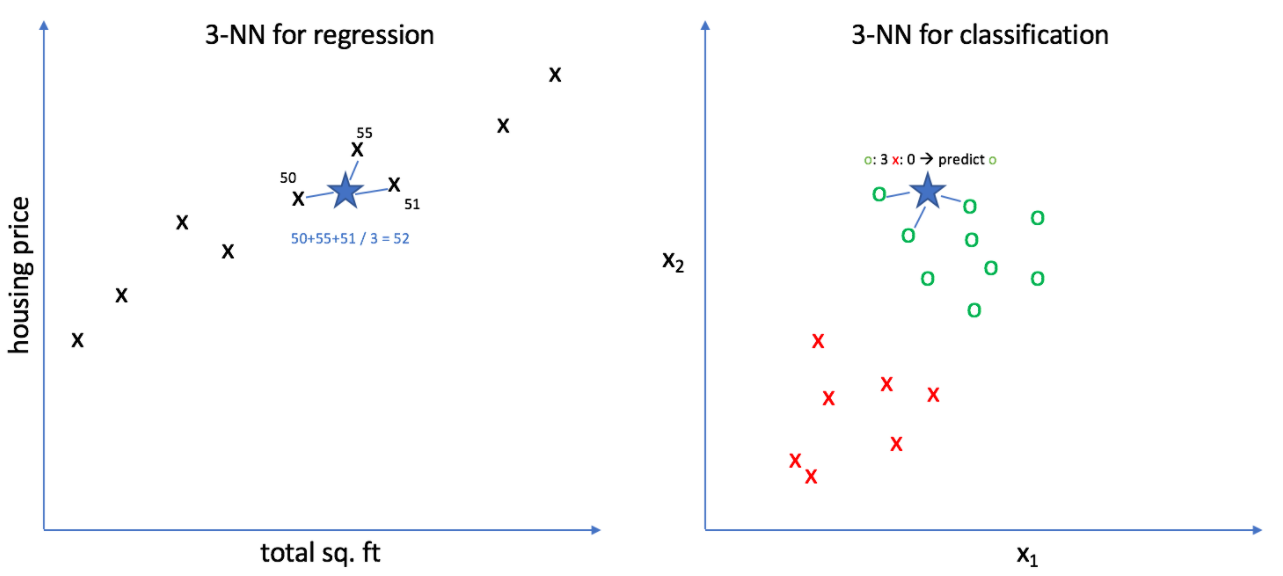
<br>
사진 출처 : https://velog.io/@arittung/DeepLearningStudyDay4
<p>
- knn 이웃 회귀 : 근처에 이웃한 k개의 좌표를 평균낸다. <br>
- knn 이웃 분류 : 근처에 이웃한 k개의 클래스를 확인하고, 다수결을 통해 새로운 정보의 클래스를 결정한다.

### 3) 농어의 길이만을 사용한다
농어에는 다양한 특성이 있다. 길이와 무게 말고도, 두께 등의 특성이 있지만..

여기서는 **길이만을 사용**할 것이다. 두께라는 새로운 특성을 하나 더 쓴다면, 2차원으로 그래프에 나타내는 것이 어렵다. (차원이 늘어난다) <p>
따라서, 길이만을 통해 농어의 무게를 예측하는 회귀모델을 만들어보려한다.

In [5]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

#훈련세트와 테스트세트로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

#훈련세트와 테스트세트를 2차원 배열로 바꾼다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


- 우선, 이전처럼 model_selection 모듈의 train_test_split을 import해서 훈련세트와 테스트세트를 나눈다.<p>
- 여기서는 **stratify를 사용하지 않는다.** 이전에는 stratify에 타깃값을 넣었는데, 여기서는 임의의 값을 구하는 것이므로, 타깃값을 골고루 섞어 줄 필요가 없다.<p>
- 참고로, 사이킷런은 입력데이터가 2차원 데이터이리라고 기대하고 있다. 그래서 1차원 데이터를 2차원으로 바꿔주어야하는데, 이때 쓰는 넘파이 함수가 **reshape**이다.
- 타깃 데이터는 1차원 데이터로 사용한다. 따라서 reshape로 재배열하지 않아도 된다.

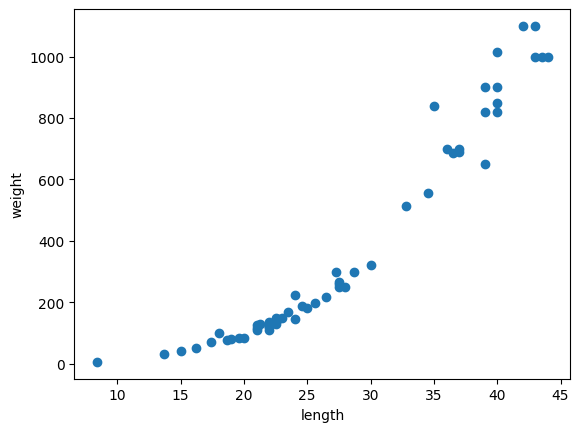

In [6]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

산점도로 농어 데이터를 표현하면 다음과 같다. <p>
이제, 이 데이터로 모델을 훈련시켜보려한다.

- KNN은 새로운 데이터의 근처의 데이터들을 사용해 값을 예측한다.
- 이때, 원래 데이터에서 많이 동떨어진 데이터라면, 정확하게 값을 예측하기 힘들다.
- 즉,

### 4) 회귀 모델 훈련

In [8]:

from sklearn.neighbors import KNeighborsRegressor

# 회귀 클래스 선언 대부분 분류일 경우 Classifier라 쓰고,
# 회귀일 경우에는 Regressor라고 함.

knr = KNeighborsRegressor()

# 클래스 인스턴스 할당
knr.fit(train_input, train_target)

# 모델 훈련

knr.score(test_input, test_target)

0.992809406101064

- **KNN 회귀 모델**을 호출한다.
- 여기서 중요한 점은, score를 통해 나온 값이 **정확도가 아니다**라는 점이다.
- 회귀의 경우, score로 나오는 값은 **결정계수**이다. <p>
- *R^2 = 1 - (타깃 - 예측)^2의 합 / (타깃-평균)^2의 합* <p>

예측값이 타깃값과 비슷하다면, 분자의 값이 줄어 좌항의 값이 줄어들 것이고, 예측값이 평균값과 비슷하다면 (대충 예측을 했다면) 분모의 값이 줄어 좌항의 값이 커질 것이다.
- 따라서 R^2값이 클 수록 예측값이 각 타깃에 맞게 잘 예측을 한 것이고, 작다면 예측값이 각 타깃에 맞지 않게 평균값 위주로만 예측한 것이다.


- R^2 말고도 다른 지표로도 모델을 평가할 수 있다.
- MAE, 즉 **평균절댓값오차**이다. (또는 MSE)



In [9]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


- MAE를 통해, 오차가 + 또는 -로 19g정도임을 확인할 수 있다.

### 5) 과대적합 및 과소적합

In [12]:
knr.score(train_input, train_target)

0.9698823289099254

In [13]:
knr.score(test_input, test_target)

0.992809406101064

- 보통은 훈련 점수가 좀 더 높고, 테스트 점수가 낮게 나오는 게 일반적이다.

- 위처럼 훈련 세트보다 테스트 세트의 점수가 높을 때에는, 훈련세트를 적절히 학습하지 못했다. 즉, **과소적합** 되었다고 한다. (underfitting)

- 반대로, 훈련 세트의 점수가 높고, 테스트 점수가 매우 낮은 경우에는, **과대적합**되었다고 한다. (너무 훈련으로만 맞게해서, 실제로 사용하기엔 형편없는) (overfitting)

- 위의 경우에는, 테스트 세트의 점수가 더 높은 것을 보아 과소적합 되었음을 확인할 수 있다.

<p>
이제, 이 과소적합을 해결해보자.

### 6) 이웃 개수 조절하기

- k의 개수를 늘리면 : 과소적합 (ex : k를 전체로 두면, 하나의 값만 예측)

- k의 개수를 낮추면 : 과대적합 (ex : k = 1 이면, 훈련세트의 전체적인 경향을 따르지 못하고, 샘플 하나하나의 값에 바뀌는)

In [15]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))


0.9804899950518966
0.9746459963987609


- 위 경우에는, k = 3으로 두었을 때, 결과가 가장 이상적으로 출력되었음을 확인할 수 있다.
- 테스트용으로, k=1, k=2, k=42의 경우도 확인해보자.

In [17]:
# k=1
knr.n_neighbors = 1
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))


0.9852830341215901
0.991309195814175


In [20]:
# k=2
knr.n_neighbors = 2
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))

0.9828437127041165
0.9725010241788556


In [19]:
# k=42
knr.n_neighbors = 42
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.0
-0.05511282928252759


- 여기서, k의 값은 우리가 임의로 지정해줘야한다. 이렇게 사람이 직접 값을 지정해줘야하는 파라미터를 **하이퍼파라미터**라고 한다.

## 2. 선형 회귀


### 1) KNN 회귀의 단점

- 예를 들어, 훈련 세트와 동 떨어진 새로운 데이터의 값을 예측해야한다고 해보자.
- knn은 원래 가지고 있는 데이터만을 이용하기 때문에, 이와 같은 경우에는 대응하기 어렵다.
- 즉, **훈련세트 밖에 있는 샘플의 값을 예측하기 어렵다는 단점이 있다. 그 범위 바깥을 넘어가면 추정하기가 힘들어진다.**

- 따라서,추세를 따라갈 수 있는 알고리즘을 이용해야한다.

### 2) 선형회귀 (Linear Regression)


In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대한 예측, [1241.83..]
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

#출력값 [39.01..] - 709.018..

[1241.83860323]
[39.01714496] -709.0186449535477


- **선형회귀 모델은 `sklearn.linear_model` 모듈의 `LinearRegression`을 임포트** 함으로써 사용할 수 있다.
- 클래스이므로 이전처럼 똑같이 인스턴스를 할당하고,
- `lr.fit`을 통해 모델을 훈련시킨다.
- `lr.predict`를 통해 예측값을 확인해보자. 이 문제에서 50cm 농어는 1.5kg이어야 하는데, 1.2kg이 결과로 나왔다.
- 선형회귀로 만든 일차식의 기울기와 y절편을 확인해보자.
- 기울기 : `lr.coef_`
- y절편 : `lr.intercept_`
- 참고로, 뒤에 '_'를 붙이는 이유는 사용자가 지정한 값이 아닌, 데이터로 학습을 통해 얻은 값임을 구분하기 위함이다.
- 기울기가 배열의 형태로 나타내어진 이유는, 길이 특성 하나가 아니라 여러 개의 특성을 활용할 수도 있기 때문에, 기울기는 배열의 꼴로 나타낸다. (위 예시에서는 하나만 사용했기 때문에 배열 안에 하나의 원소만 있는 것이다.)

### 3) 학습한 직선 그리기


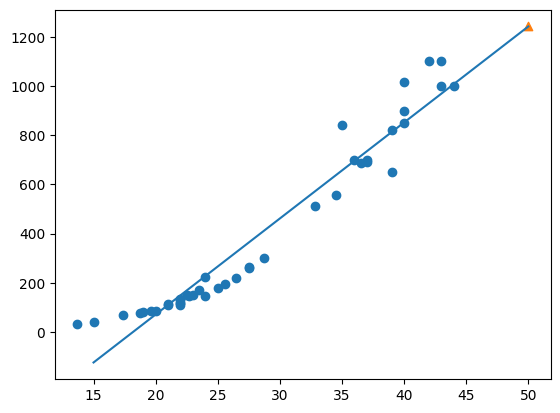

0.939846333997604
0.8247503123313558


In [23]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식을 그립니다.
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# x축, y축을 설정한다.

# 15에서 50까지, 범위 설정(x좌표), y좌표는 기울기와 절편을 x에 곱해서, (15와 50에)

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^')
plt.show()



print(lr.score(train_input, train_target))
#0.9398...

print(lr.score(test_input, test_target))
#0.82... 좀 낮다..

- 직선이 데이터에 빗겨난 부분이 많은 점과,
- **음수 데이터가 있다**는 점이 문제다. 무게값이 음수로 나타내어지면 아무래도 어색하다. (이전에서도 y절편이 음수값으로 나왔음을 확인할 수 있다.)

### 4) 다항 회귀


- 다항식을 만들어보자! 즉, 다항식의 계수를 만들어보자.

- 클래스가 따로 있는 건 아니고, 직접 만들어서 linear_regression 클래스에 넣어주면 됨.

- 여기서는 길이의 제곱항을 하나 더 만들어보면 된다.

In [27]:
#열이 2개인 2차원 데이터로 만든다.

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

- `np.column_stack` 함수를 사용해, 열 방향으로 길이를 제곱한 값과 길이 값을 넣는다.

### 5) 모델 다시 훈련


In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

#target은 변동이 없음. 예측하고자하는 농어의 무게값은..

print(lr.predict([[50**2, 50]]))
#[1573.9842..]

print(lr.coef_, lr.intercept_)
#[ 1.014.. -21.5579..] 116.0502..

#즉, 무게 = 1.01x^2 - 21.6x + 116.05

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


### 6) 학습한 직선 그리기

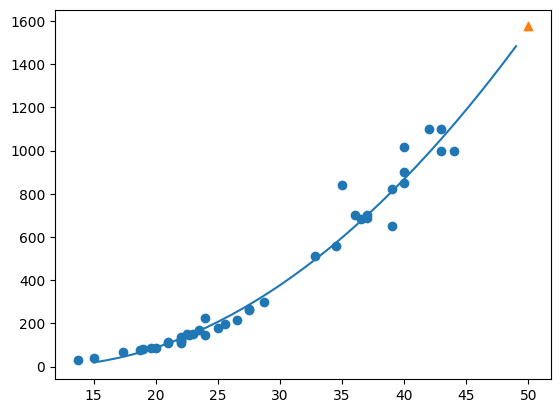

0.9706807451768623
0.9775935108325122


In [31]:
#구간별 직선을 그리기 위해 15에서 49까지 정수배열을 만든다. 즉, 직선을 잘게 쪼개서..
point = np.arange(15,50)

#훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그린다. 즉, 아주 잘게 쪼갠 직선을 이어서 붙인 것.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
#0.970..

print(lr.score(test_poly, test_target))
#0.977..

## 3. 특성 공학과 규제


### 1) 다중회귀와 특성 공학


- multiple regression이라고도 한다. (여러 개의 변수를 이용)

- 이번에는 높이 말고도, 두께 데이터까지 사용해보려 한다.

- (이번에는 산점도를 쓸 수 없음에 주의) 그래서 score로만 모델의 적합성을 확인해볼 것이다.

- 이전처럼 길이 제곱, 높이 제곱 등, 여러가지 속성을 조합해서 해볼 것이다. **새로운 특성을 변경, 조합 등을 하는 걸 특성공학**이라고 한다.

### 2) 판다스로 데이터 준비

In [48]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')

# read_csv 메소드를 통해 링크의 csv를 가져온다. 이를 판다스의 데이터프레임으로 만들어준다.
# 첫 번째 행이 각 열의 이름으로 설정됨. (제목행을 자동으로 인식한다.)

perch_full = df.to_numpy()

print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

- 판다스는 가져온 데이터를 **데이터프레임**으로 처리한다.
- `read_csv` 메소드를 통해, 링크 내의 csv 파일을 dataframe의 형식으로 가져온다.
- 첫 번째 행이 각 열의 이름으로 설정된다.
- `to_numpy()` 메소드로, 데이터프레임을 넘파이배열로 전환한다.
- 출력한 값을 확인해보아, 3개의 열(특성)을 가진 넘파이 배열이 나옴을 확인할 수 있다.

In [52]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

### 3) 다항 특성 만들기


- 이전엔, `np.column_stack`을 통해 배열을 직접 만들어 다항 특성을 만들었었다.
- 이번에는, sklearn의 클래스를 통해 특성 공학을, 즉 다항 특성을 만들어보려한다.

In [49]:

from sklearn.preprocessing import PolynomialFeatures

# degree = 2 즉, 제곱항을 만들어주는. 기본이 2다. 여기서는 기본값을 그대로 사용할 것이다.

poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2,3]]))
#[[1. 2. 3. 4. 6. 9 ]]

# 1은 절편을 위한 특성, 나머지는 제곱, 곱하거나해서 만든 값.
# 가상의 샘플 데이터를 생성한다.

[[1. 2. 3. 4. 6. 9.]]


- `sklearn.preprocessing` 모듈의 `PolynomialFeatures` 클래스를 이용할 것이다.
- **사이킷런의 일관된 api 때문에, 훈련(fit)을 해야 변환(transform)이 가능**하다.
- 두 메서드를 하나로 붙인 fit_transform도 있지만, 단계적으로 하는게 가독성에도 좋다.
- **`poly.fit([[2,3]])` : 변환기는 입력 데이터를 변환하는데 타깃 데이터가 필요하지 않다.** 따라서 모델 클래스와는 다르게 fit()에 입력데이터만 전달했다.
- 프린트문을 통해, 특성이 많아졌음을 확인할 수 있다.

### 4) LinearRegression


In [53]:

poly = PolynomialFeatures(include_bias=False)

# 기본값은 True. 임의로 include_bias를 False로 해주어야한다.

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)
# 42개의 행(샘플), 9개의 열(특성)

test_poly = poly.transform(test_input)

(42, 9)


- `poly.fit(train_input)`과 `train_poly = poly.transform(train_input)` 을 통해 훈련과 학습을 진행한다.
- `print(train_poly.shape)` 를 통해, train_poly의 행렬을 확인한다.
- 테스트 세트 또한 trasnform 한다. 이때, 훈련세트를 통해 fit한 poly를 통해 transform 한다.

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
# 0.99..

print(lr.score(test_poly, test_target))

# 0.97.. 인데, test세트의 점수를 더 높여보자.

0.9903183436982125
0.9714559911594111


- LinearRegression함수를 통해 각각의 점수를 확인해보았다.

### 5) 더 많은 특성 만들기


In [55]:

poly = PolynomialFeatures(degree = 5, include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

# (42, 55) 엄청.. 많이 나왓겟지

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
# 0.999

print(lr.score(test_poly, test_target))
# -144...

(42, 55)
0.9999999999996433
-144.40579436844948



- 맞춰야할 대상보다 사용하는 도구가 더 많아서(특성이 55개임을 보아), 즉 과대적합 되었음을 확인 가능하다.

- **규제를 통해, 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록한다.**

- 즉,** 가중치(기울기)를 작게 만들어야한다.**

- poly.fit(test_input)은 할 필요가 없다. 테스트 세트는, 변환(fit)하지 않고 훈련세트에서 먼저 학습한 개체로 사용(transform)한다.

### 6) 규제 전에 표준화


- 규제를 하려면, 특성의 선형 모델의 기울기, 가중치에 벌칙을 가해야하는데, 특성이 다르다면 특성의 기울기도 달라질 것이다.

- 이번에는 수동으로 표준화하지 말고, sklearn의 클래스를 이용해서 해보자.

In [56]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- preprocessing 모듈에서 StandardScaler 클래스를 가져온다.
- 이 모듈을 train_poly를 통해 fit하고, 각각 transform 한다.

### 7) 릿지 회귀
릿지 회귀는 **가중치(기울기)의 제곱**을 벌칙으로 가한다.

In [58]:

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


- linear_model 모듈 내의 Ridge 클래스를 가져온다.
- Ridge 모델은 훈련 세트와 테스트 세트 모두 필요하다.
- 훈련세트의 스코어가 조금 줄었음을 확인할 수 있다.
- **alpha 매개변수는 기본적으로 1**, alpha값이 커지면 규제가 세지고, 작으면 규제가 약해짐.

### 8) 적절한 규제 강도 찾기
하나하나 해 볼 수 밖에 없다. for문을 통해 찾아보자.

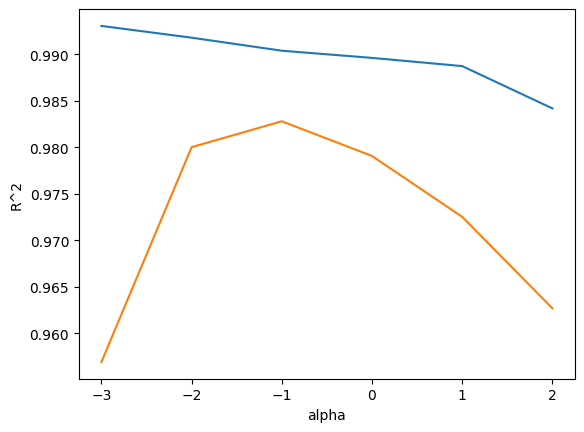

In [62]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
#로그 스케일로 알파값을 지정하는 것이 관례이다.
for alpha in alpha_list:

  # 릿지 모델을 만든다.
  ridge = Ridge(alpha = alpha)

  #릿지 모델을 훈련한다.
  ridge.fit(train_scaled, train_target)

  #훈련 점수와 테스트 점수를 저장한다.
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

알파값이 -1, 즉 0.1일 때 테스트 세트와 훈련 세트의 차이가 적고, R^2의 값도 높은 것을 확인할 수 있다.

In [63]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


그래프에서 alpha가 -1일 때의 값과 같다.

### 9) 라쏘 회귀
라쏘 회귀는 **가중치(기울기)의 절댓값**을 벌칙으로 준다.

In [70]:

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# 아까처럼 똑같이.. 해서

lasso = Lasso(alpha=10)

lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))

#40 : true를 하면 1로 판단하는데, 55개 중 15개만 사용하고 나머지 40개는 사용하지 않았음을 확인 가능하다.

0.989789897208096
0.9800593698421883
0.9888067471131867
0.9824470598706695
40


- 보통은 릿지를 많이 쓴다. 규제가 좀 더 효과적으로 이루어지기 때문.
- 라쏘는.. 특성과 가중치를 곱할 때, 가중치를 완전히 0으로 만들 수 있다. (특성을 사용하지 않을 수 있다.)

## 4. 럭키 백
회귀? 분류?

### 1) 회귀인가 분류인가


- 숫자 예측이니까.. 회귀다? 아니다.
- 분류문제이다. 도미인지 빙어인지 **분류를 하면서, 이 샘플이 도미인지 얼마나 확신을 하는지를 확률로서 표현하는 것.**

### 2) 확률 계산하기

- 이번 예시에서는 길이, 대각선, 높이, 두께를 사용해보려한다.

- KNN을 사용한다면, 주변의 클래스가 무엇인지에 따라 확률을 나타낼 수 있을 것이다.

- 예를 들어, k=10인데 주변에 3개의 도미가 있다면 도미일 확률이 3/10, 7개의 빙어가 있다면 빙어일 확률이 7/10. 이런식으로 말이다.

In [74]:

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish.head())
#처음 행 몇 개를 이쁘게 보여줌.옆에 인덱스는 판다스가 붙인 거고, 원래는 없음.

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
#몇 개의 열만을 선택해서 새로운 배열 만들기

fish_target = fish['Species'].to_numpy()

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [77]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

- 보면, 각 값의 스케일이 다르기 때문에 변환하는 과정이 필요하다.

In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 4) KNN의 다중 분류


In [79]:

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
#species가 문자열인데.. 이전에는 정수로 레이블링을 했었으나, 사이킷런은 사실 문자열도 받음.

print(kn.classes_)
# 속성 확인, 알파벳 순서대로

print(kn.predict(test_scaled[:5]))

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- 각 속성들이 Bream, Parkki... Whitefish, 즉 7개의 클래스가 있음을 `kn.classes_`를 통해 알 수 있다.
- `predict_proba` 함수를 통해, 각 예측값에 대한 확신 확률 정도를 확인할 수 있다.

## 5. 로지스틱 회귀
이름은 회귀지만, 사실 분류 문제에 쓰인다.

### 1) 로지스틱 회귀란?



- 분류 알고리즘이다.

- z = a x 무게 + b x 길이 + c x 대각선 + d x 높이 + e x 두께 + f

- 선형함수를 학습하는.. z값을 그대로 사용하면 회귀고, 이걸 0~1의 범위로 바꿔주면 분류문제로서 활용 가능하다.

- **시그모이드함수 또는 로지스틱함수**를 통해 0과 1의 사이로 변환한다. (S자 모양..)

- 그래프의 형태가** 1 / 1 + e^-z**

- **0.5보다 크면 양성, 작으면 음성으로 판단**한다.
- (사실 z값을 통해 양성 음성을 확인할 수 있음. 왜냐면 0을 기준으로 나뉘니까..)
그래서 확률 자체를 뽑고싶다면 함수를 쓰는 거고, 그냥 양음성 여부만 확인하고 싶다면 z값만 확인해도 된다.

- **딱 0.5면?... 일반적으로는 음성으로 판단**한다.

### 2) 로지스틱 회귀 (이진 분류)

In [80]:

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

#불리언 인덱싱을 사용한다. true인 인덱스만 뽑아낸다. or연산자로 둘 중 하나만 만족해도 뽑아낸다.

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


- 순서대로 음성 클래스의 확률, 양성 클래스의 확률이다.
- 여기서는 알파벳 순서대로 번호를 매겨서, 도미가 0 빙어가 1이 된다.



### 3) 로지스틱 회귀 계수 확인

In [81]:

print(lr.coef_, lr.intercept_)

#즉, z = -0.404x무게 - 0.576x길이 -0.663x대각선 -0.013x높이 -0.732x두께 -2.161

decisions = lr.decision_function(train_bream_smelt[:5])

#decision_function은 z값을 출력한다. 이제 sigmoid함수에 넣어보자.
print(decisions)

from scipy.special import expit
print(expit(decisions))

#확률을 확인 가능하다.

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]



- 즉, **로지스틱회귀가 이진 분류일 경우, 양성 클래스의 z값만을 계**산한다. (확률 계산시에는 1에서 빼면 되니까 음성 클래스의 z값도 얻을 수 있다.)

### 4) 로지스틱 회귀 (다중분류)

In [82]:

lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

#5개의 행, 7개의 확률 (클래스가 7개라)

print(lr.coef_.shape, lr.intercept_.shape)

0.9327731092436975
0.925
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
(7, 5) (7,)




-** max_iter가 반복횟수**, 여기서는 1000으로 설정해두었다.
- C는 매개변수. 규제가 기본적으로 정해져있는데, 이 규제를 설정할 수 있다. 분류 모델의 규제 매개변수는 'C'.
- ** C가 올라가면 규제가 약해지고, C가 낮아지면 규제가 강해진다.** (규제의 역수라고도 표현하긴 함..)
- **C의 기본값은 1.**


### 5) 소프트맥스 함수

In [84]:

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

# 소프트맥스 함수는 z값을 지수함수에 적용함.
# ex ) z1, z2 .. z7까지 다 하고, 이 모든걸 sum한 것으로 나눔. 이걸 다 더하면 1이겟지..

from scipy.special import softmax

proba = softmax(decision, axis = 1)
print(np.round(proba, decimals = 3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
